In [195]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import skrf as rf
from IPython.display import Image, display
from scipy.optimize import curve_fit
prop_cycle = rcParams['axes.prop_cycle']   
colors = prop_cycle.by_key()['color']
import scipy.constants as sc
from skrf import Frequency, Network

In [196]:
path_fig="..//Figures/" 

Nous allons simuler le circuit de mesure d'un transmon couplé à une cavité (circuit ci-dessous) 

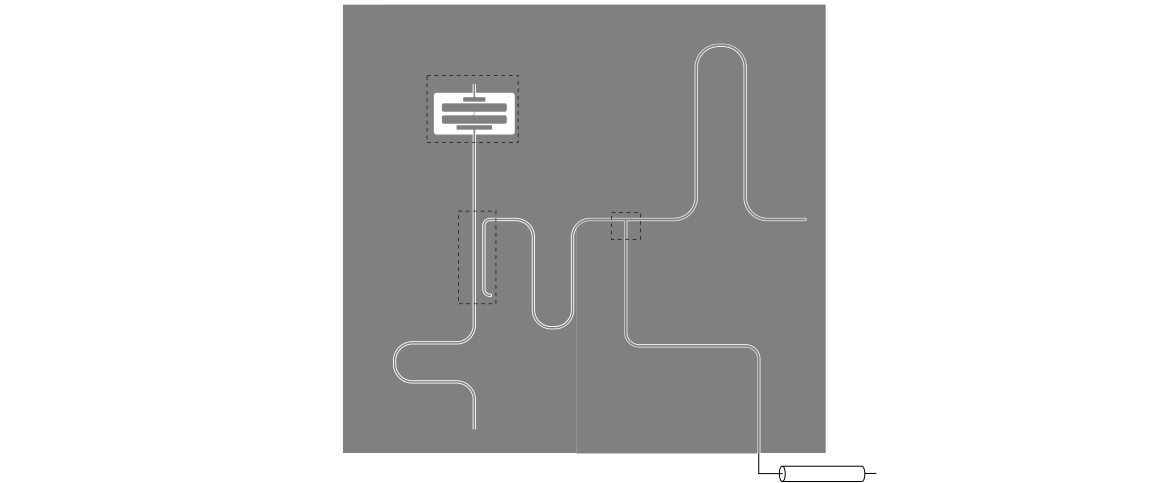

In [197]:
Image(filename=path_fig+"Transmon_6GHz.png")

# Ligne de transmission CPW

Le circuit (mis à part la jonction Josephson) est réalisé à l'aide d'une couche mince de tantale, caractérisée par une température critique $T_c \simeq 4.4\,\mathrm{K}$ et une inductance cinétique $L_k = 0.2\,\mathrm{pH/sq}$, déposée sur un substrat de saphir d'épaisseur $500\,\mu\mathrm{m}$ (utiliser le *general model* pour créer un nouveau métal).

Simuler la ligne CPW ($w = 17\,\mu\mathrm{m}$, $g = 10\,\mu\mathrm{m}$) et en déduire son impédance caractéristique ainsi que la vitesse de propagation du signal. L'ensemble des simulations se fera entre $3$ et $7\,\mathrm{GHz}$.


# Coupler / Connection 

Importer le design du coupleur et de la connexion en T (fichiers *Qubit_coupler.GDS* et *Qubit_T_connection.GDS*).

Simuler ces circuits en tantale sur saphir dans la bande passante $[3\,\mathrm{GHz}, 7\,\mathrm{GHz}]$ avec une *cell size* de $2.5\,\mu\mathrm{m} \times 2.5\,\mu\mathrm{m}$. Il faudra bien repérer les numéros de ports associés au schéma.


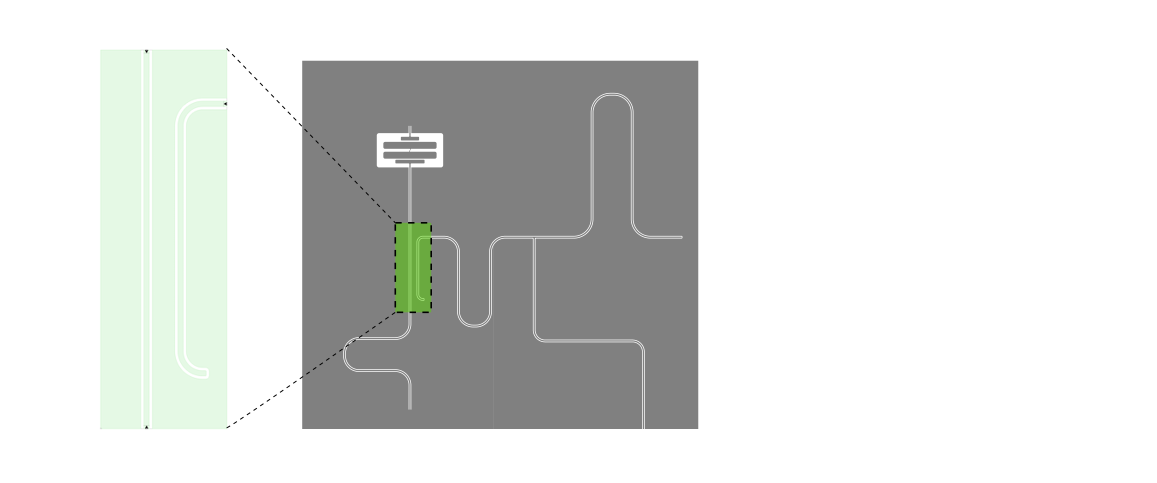

In [207]:
Image(filename=path_fig+"Transmon_coupler.png")

In [208]:
coupler=rf.Network(path_Sonnet+"Qubit_coupler.s3p")

- port 1 is connected to coupler_T
- port 2 is connected to coupler_Qubit
- port 3 is connected to the shorted end of the quarter wave resonator

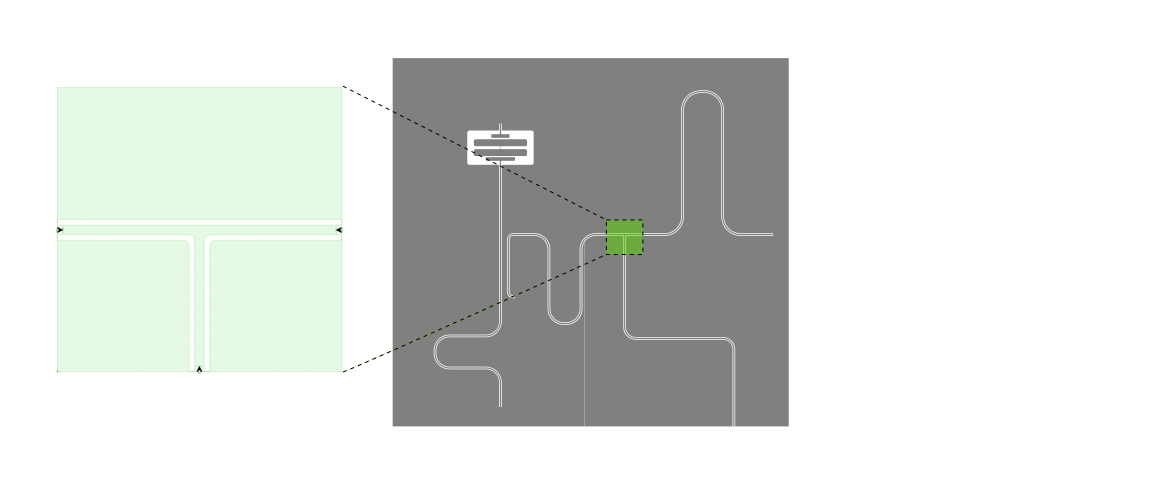

In [209]:
Image(filename=path_fig+"Transmon_T.png")

In [210]:
T_conn=rf.Network(path_Sonnet+"Qubit_T_connection.s3p")

- port 1 is connected to T_feed
- port 2 is connected to T_Purcell right
- port 3 is connected to coupler

# Qubit couplé capacitivement

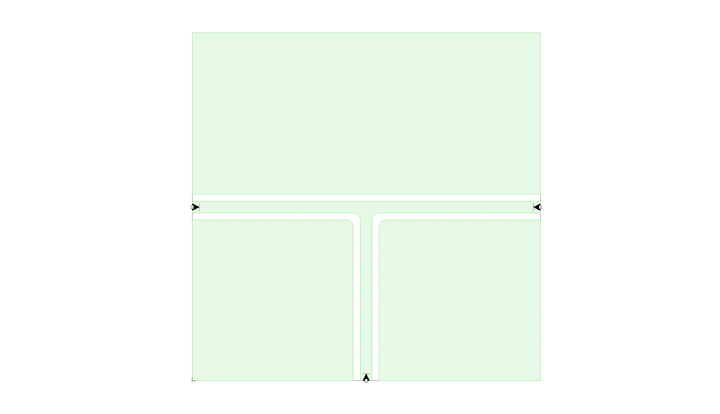

In [211]:
Image(filename=path_fig+"Qubit_T_connection.png")

- Importer le design de la capacité du transmon (*Qubit_junction.GDS*).
- Calculer la capacité du transmon en utilisant des ports balancés.
- Déduire, à partir de la valeur de la capacité $C$, l'énergie de charge $E_c$.
- Sachant que l'énergie de la transition $g \rightarrow e$ du transmon est donnée par $E_{ge}=\sqrt{8E_jE_c}-E_c$ et que la fréquence du qubit est $f_q \simeq 3.87\,\mathrm{GHz}$, déduire la valeur de l'énergie Josephson $E_j$ et l'inductance $L_g$ de la jonction Josephson correspondant à l'état fondamental.
- Simuler l'état excité du qubit avec une inductance $L_e$ assurant une résonance du qubit à la fréquence $f_q$.
- Simuler la réflexion $S_{11}$ au niveau de la capacité connectée au résonateur de lecture pour les deux valeurs de $L_g$ et $L_e$ (fichiers *Qubit_junction_self_param1.s1p* et *Qubit_junction_self_param2.s1p*).
- Créer les structures `skrf` correspondantes : `Qubit_g` et `Qubit_e`.


# Simulation du réseau avec skrf

- Vérifier que vous avez bien créé les structures `skrf` suivantes : `coupler`, `T_conn`, `Qubit_g` et `Qubit_e`.
- [Interpoler les fréquences](https://scikit-rf.readthedocs.io/en/latest/api/generated/skrf.networkSet.NetworkSet.interpolate_frequency.html) de l'ensemble de ces structures.
- Définir les longueurs des 5 CPW du réseau : `L_coupler_Qubit`, `L_coupler_res_end`, `L_T_Purcell`, `L_coupler_T` et `L_T_feed`.
- Créer des lignes de transmission `skrf` définies par une longueur $L$, une impédance caractéristique $z0$ et une vitesse de propagation $c$, en vous aidant de l'exemple ci-dessous :


In [ ]:
s = np.zeros((Nf, 2, 2), dtype=complex)
s[:, 0, 1] = np.exp(-1j * 2 * np.pi * f / c * L)
s[:, 1, 0] = np.exp(-1j * 2 * np.pi * f / c * L_coupler_Qubit)
CPW= rf.Network(frequency=freq, s=s_coupler_Qubit, z0=50, name='CPW_a_b')

# Circuit

- créer 2 [ports](https://scikit-rf.readthedocs.io/en/latest/api/generated/skrf.circuit.Circuit.Port.html), un [ground](https://scikit-rf.readthedocs.io/en/latest/api/generated/skrf.circuit.Circuit.Ground.html) et un [open](https://scikit-rf.readthedocs.io/en/latest/api/generated/skrf.circuit.Circuit.Open.html), 
- créer deux [connexions](https://scikit-rf.readthedocs.io/en/latest/api/generated/skrf.circuit.Circuit.connections_list.html) simulant le qubit dans les états $|0\rangle$ et  $|1\rangle$

# Effet du filtre

- Créer une connexion en remplaçant le qubit par un deuxième port.
- Observer ce que « voit » le qubit en mesurant $S_{21}$ (il faut interroger le circuit pour savoir où sont connectés les ports 1 et 2 : https://scikit-rf.readthedocs.io/en/latest/api/generated/skrf.circuit.Circuit.port_indexes.html).
